In [53]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [54]:
y = np.load('MNIST-labels.npy')
X = np.load('MNIST-images.npy')
X_train,X_test_val,y_train,y_test_val = train_test_split(X, y, test_size=0.2, random_state = 42)
X_test,X_val,y_test,y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state = 42)


Text(0.5, 1.0, 'Distribution of labels in training data')

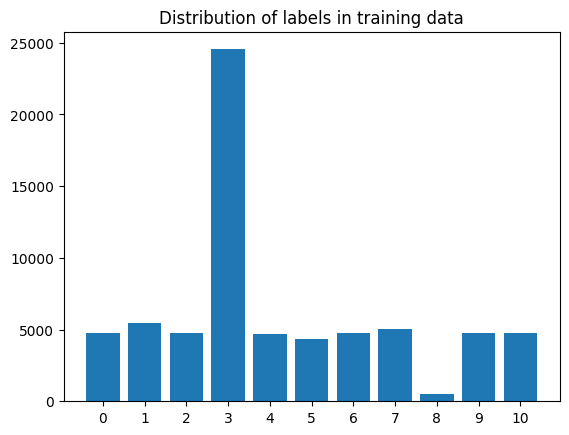

In [55]:
rg = np.arange(0,11)
labels = pd.DataFrame(y_train).value_counts().sort_index().values
plt.xticks(rg)
plt.bar(rg,labels) # Using bar because histogram columns for 9 and 10
plt.title('Distribution of labels in training data')

In [58]:
# X_train[0][X_train[0]<100]
X_train = np.where(X_train<200,0,X_train)

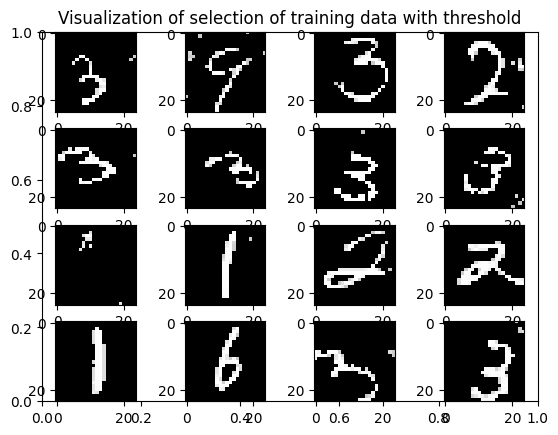

In [59]:
fig = plt.figure()
plt.title('Visualization of selection of training data with threshold')
amount = 16
square = math.ceil(math.sqrt(amount))
# X_train = np.where(X_train<20,0,X_train)
for i in range(amount):
    fig.add_subplot(square, square, i+1)
    plt.imshow(X_train[i], cmap='gray')

